In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [197]:
# DUNNOV TEST alebo MANN-WHITNEY TEST (i. s Bonferoni, ii. bez Bonferoni)

# Načítanie dát
dunn_6_data = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Dunn/dunn_df_03_06_2022_all.csv')
dunn_7_data = pd.read_excel('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Dunn/dunn_df_17_07_2022_all.xlsx')
dunn_8_data = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Dunn/dunn_df_04_08_2022_all.csv')
dunn_9_data = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Dunn/dunn_df_23_09_2022_all.csv')
dunn_10_data = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Dunn/dunn_df_20_10_2022_all.csv')
dunn_8_23_data = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Dunn/dunn_df_11_08_2023_all.csv')

# ...7_data si musel upravit v exceli
# ...8_23_data si musel prepisat Edge-Roof na Roof-Edge

dunn_6_data

,index,Wavelength_Number,Control-Interior,Control-Roof,Control-Edge,Interior-Roof,Interior-Edge,Roof-Edge
0,b_1_384.55,384.55,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,3.703447e-01,1.000000e+00
1,b_2_398.80,398.80,8.507887e-12,0.459089,1.000000e+00,2.533468e-08,2.494999e-13,3.576510e-01
2,b_3_413.05,413.05,3.408181e-09,1.000000,1.106019e-01,3.101465e-15,1.932845e-19,9.985488e-01
3,b_4_427.31,427.31,5.529811e-09,1.000000,2.930981e-01,6.025792e-13,1.918807e-17,7.698720e-01
4,b_5_441.56,441.56,2.058061e-09,1.000000,2.395524e-01,3.780365e-12,1.889683e-18,2.615331e-01
...,...,...,...,...,...,...,...,...
135,b_136_2382.5,2382.50,1.000000e+00,1.000000,1.346764e-07,8.015078e-01,4.847549e-12,6.895950e-08
136,b_137_2397.5,2397.50,1.000000e+00,1.000000,1.043405e-08,1.000000e+00,1.994365e-12,1.616157e-08
137,b_138_2412.5,2412.50,1.000000e+00,1.000000,9.126704e-11,1.000000e+00,1.109553e-13,8.997132e-10
138,b_139_2427.5,2427.50,1.000000e+00,1.000000,1.009232e-14,1.000000e+00,1.491133e-16,1.490837e-12


In [198]:
# Extract 'index' (row names) and 'C-I' ( cize 'Control-Interior') from each dataframes
dunn_C_I_data = pd.DataFrame({
    'index': dunn_6_data['index'],
    'C_I_6': dunn_6_data['Control-Interior'],
    'C_I_7': dunn_7_data['Control-Interior'],
    'C_I_8': dunn_8_data['Control-Interior'],
    'C_I_9': dunn_9_data['Control-Interior'],
    'C_I_10': dunn_10_data['Control-Interior'],
    'C_I_8_23': dunn_8_23_data['Control-Interior']
})

# Extract 'index' (row names) and 'C-R' ( cize 'Control-Roof') from each dataframes
dunn_C_R_data = pd.DataFrame({
    'index': dunn_6_data['index'],
    'C_R_6': dunn_6_data['Control-Roof'],
    'C_R_7': dunn_7_data['Control-Roof'],
    'C_R_8': dunn_8_data['Control-Roof'],
    'C_R_9': dunn_9_data['Control-Roof'],
    'C_R_10': dunn_10_data['Control-Roof'],
    'C_R_8_23': dunn_8_23_data['Control-Roof']
})

# Extract 'index' (row names) and 'C-E' ( cize 'Control-Edge') from each dataframes
dunn_C_E_data = pd.DataFrame({
    'index': dunn_6_data['index'],
    'C_E_6': dunn_6_data['Control-Edge'],
    'C_E_7': dunn_7_data['Control-Edge'],
    'C_E_8': dunn_8_data['Control-Edge'],
    'C_E_9': dunn_9_data['Control-Edge'],
    'C_E_10': dunn_10_data['Control-Edge'],
    'C_E_8_23': dunn_8_23_data['Control-Edge']
})

# Extract 'index' (row names) and 'I-R' ( cize 'Interior-Roof') from each dataframes
dunn_I_R_data = pd.DataFrame({
    'index': dunn_6_data['index'],
    'I_R_6': dunn_6_data['Interior-Roof'],
    'I_R_7': dunn_7_data['Interior-Roof'],
    'I_R_8': dunn_8_data['Interior-Roof'],
    'I_R_9': dunn_9_data['Interior-Roof'],
    'I_R_10': dunn_10_data['Interior-Roof'],
    'I_R_8_23': dunn_8_23_data['Interior-Roof']
})

# Extract 'index' (row names) and 'I-E' ( cize 'Interior-Edge') from each dataframes
dunn_I_E_data = pd.DataFrame({
    'index': dunn_6_data['index'],
    'I_E_6': dunn_6_data['Interior-Edge'],
    'I_E_7': dunn_7_data['Interior-Edge'],
    'I_E_8': dunn_8_data['Interior-Edge'],
    'I_E_9': dunn_9_data['Interior-Edge'],
    'I_E_10': dunn_10_data['Interior-Edge'],
    'I_E_8_23': dunn_8_23_data['Interior-Edge']
})

# Extract 'index' (row names) and 'R-E' ( cize 'Roof-Edge') from each dataframes
dunn_R_E_data = pd.DataFrame({
    'index': dunn_6_data['index'],
    'R_E_6': dunn_6_data['Roof-Edge'],
    'R_E_7': dunn_7_data['Roof-Edge'],
    'R_E_8': dunn_8_data['Roof-Edge'],
    'R_E_9': dunn_9_data['Roof-Edge'],
    'R_E_10': dunn_10_data['Roof-Edge'],
    'R_E_8_23': dunn_8_23_data['Roof-Edge']
})

In [199]:
dunn_R_E_data

,index,R_E_6,R_E_7,R_E_8,R_E_9,R_E_10,R_E_8_23
0,b_1_384.55,1.000000e+00,0.236080,4.200775e-12,1.152202e-02,1.532361e-01,1.090584e-02
1,b_2_398.80,3.576510e-01,0.001977,9.631356e-09,2.608216e-07,3.564371e-02,1.263322e-07
2,b_3_413.05,9.985488e-01,0.000104,1.049380e-11,9.424011e-14,4.853194e-09,7.194258e-13
3,b_4_427.31,7.698720e-01,0.000155,6.772800e-15,9.535111e-15,3.611350e-15,6.159914e-12
4,b_5_441.56,2.615331e-01,0.016925,1.426285e-10,7.349692e-16,1.017577e-14,4.380474e-12
...,...,...,...,...,...,...,...
135,b_136_2382.5,6.895950e-08,1.000000,9.248350e-05,1.105150e-04,1.000000e+00,2.136172e-06
136,b_137_2397.5,1.616157e-08,1.000000,2.160557e-04,1.455395e-04,1.000000e+00,1.474386e-06
137,b_138_2412.5,8.997132e-10,1.000000,1.796879e-04,2.411914e-04,1.000000e+00,8.254280e-06
138,b_139_2427.5,1.490837e-12,0.989707,2.554962e-05,1.069719e-03,1.000000e+00,3.576019e-05


In [169]:
# AK JE TO UZ EXPORTOVANE, TENTO KROK VYNECHAJ

# Define the base path for saving files
base_path = "C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Time-Series/"

# Export each dataframe to its own CSV file
dunn_C_I_data.to_csv(base_path + "dunn_C_I_data.csv", index=False)
dunn_C_R_data.to_csv(base_path + "dunn_C_R_data.csv", index=False)
dunn_C_E_data.to_csv(base_path + "dunn_C_E_data.csv", index=False)
dunn_I_R_data.to_csv(base_path + "dunn_I_R_data.csv", index=False)
dunn_I_E_data.to_csv(base_path + "dunn_I_E_data.csv", index=False)
dunn_R_E_data.to_csv(base_path + "dunn_R_E_data.csv", index=False)

# AK JE TO UZ EXPORTOVANE, TENTO KROK VYNECHAJ

In [170]:
#---------------------------------------
#---------------------------------------
#----------Time-Series grafy------------
#---------------------------------------
#---------------------------------------

In [217]:
# definovanie dataframu data | stale si to vymieňaj
data = dunn_R_E_data
# Extrahovanie číselných hodnôt 'Wavelenghts' z názvu
data['Wavelenghts'] = data['index'].str.extract(r'b_\d+_(\d+.\d+)').astype(float)
data

,index,R_E_6,R_E_7,R_E_8,R_E_9,R_E_10,R_E_8_23,Wavelenghts
0,b_1_384.55,1.000000e+00,0.236080,4.200775e-12,1.152202e-02,1.532361e-01,1.090584e-02,384.55
1,b_2_398.80,3.576510e-01,0.001977,9.631356e-09,2.608216e-07,3.564371e-02,1.263322e-07,398.80
2,b_3_413.05,9.985488e-01,0.000104,1.049380e-11,9.424011e-14,4.853194e-09,7.194258e-13,413.05
3,b_4_427.31,7.698720e-01,0.000155,6.772800e-15,9.535111e-15,3.611350e-15,6.159914e-12,427.31
4,b_5_441.56,2.615331e-01,0.016925,1.426285e-10,7.349692e-16,1.017577e-14,4.380474e-12,441.56
...,...,...,...,...,...,...,...,...
135,b_136_2382.5,6.895950e-08,1.000000,9.248350e-05,1.105150e-04,1.000000e+00,2.136172e-06,2382.50
136,b_137_2397.5,1.616157e-08,1.000000,2.160557e-04,1.455395e-04,1.000000e+00,1.474386e-06,2397.50
137,b_138_2412.5,8.997132e-10,1.000000,1.796879e-04,2.411914e-04,1.000000e+00,8.254280e-06,2412.50
138,b_139_2427.5,1.490837e-12,0.989707,2.554962e-05,1.069719e-03,1.000000e+00,3.576019e-05,2427.50


In [218]:
# Filter columns starting with "A_B" | stale si to vymieňaj za spravne pary
columns = [col for col in data.columns if col.startswith('R_E')]
columns

['R_E_6', 'R_E_7', 'R_E_8', 'R_E_9', 'R_E_10', 'R_E_8_23']

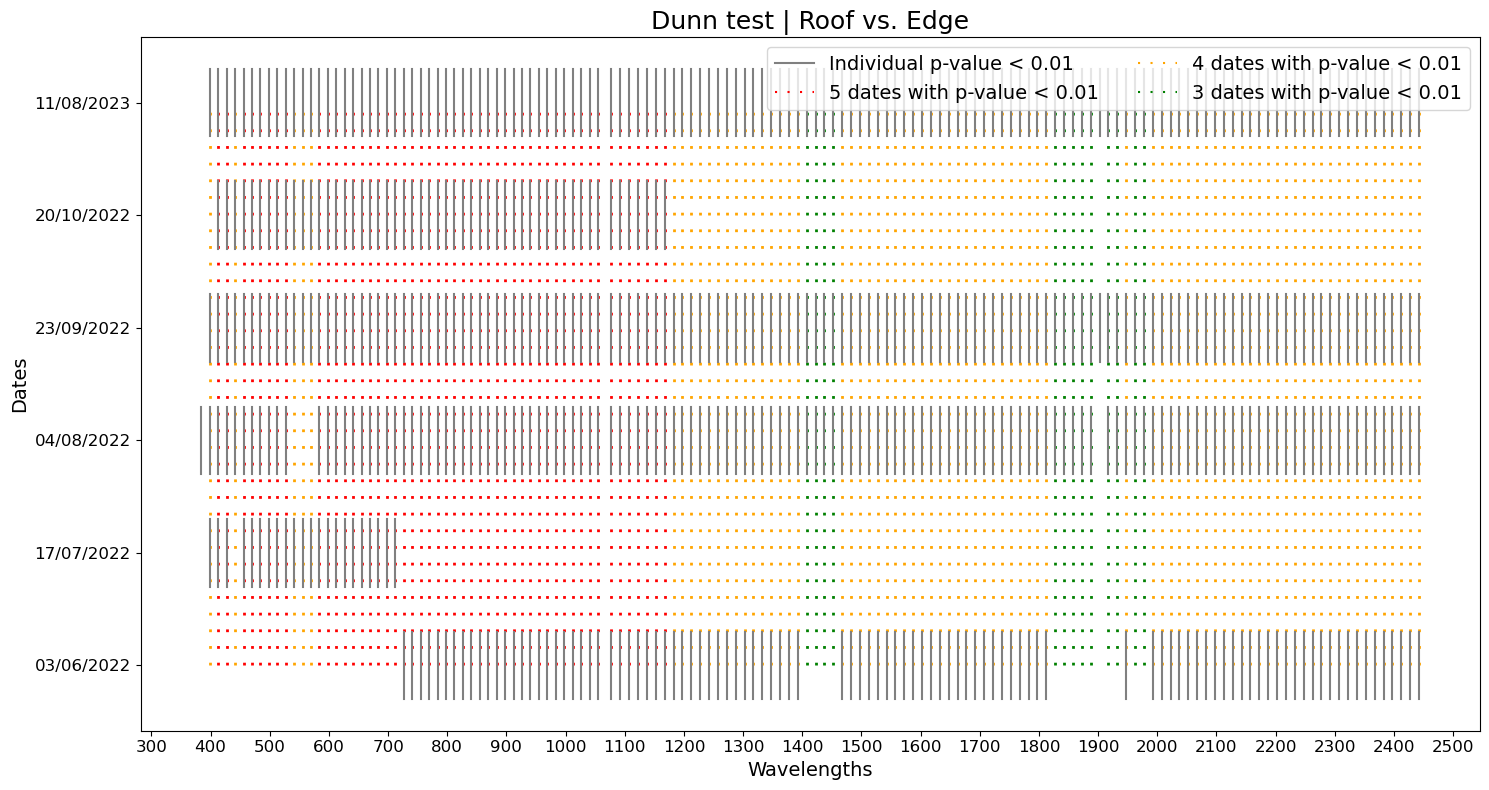

In [220]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Check for rows where the condition is met 5 or more times and plot an orange vertical line
for i, row in data.iterrows():
    condition_met = sum(row[col] < 0.01 for col in columns)
    if condition_met >= 6:
        #plt.plot([row['Wavelengths'], row['Wavelengths']], [0, len(columns)-1], color='orange', linewidth=2, linestyle=':')
        plt.plot([row['Wavelenghts'], row['Wavelenghts']], [0, len(columns)-1], color='blue', linewidth=2, linestyle=(0, (1, 5)))
    elif condition_met >= 5:
        #plt.plot([row['Wavelengths'], row['Wavelengths']], [0, len(columns)-1], color='orange', linewidth=2, linestyle=':')
        plt.plot([row['Wavelenghts'], row['Wavelenghts']], [0, len(columns)-1], color='red', linewidth=2, linestyle=(0, (1, 5)))
    elif condition_met >= 4:
        #plt.plot([row['Wavelengths'], row['Wavelengths']], [0, len(columns)-1], color='orange', linewidth=2, linestyle=':')
        #plt.plot([row['Wavelenghts'], row['Wavelenghts']], [0, len(columns)-1], color='orange', linewidth=2, linestyle=':')
        plt.plot([row['Wavelenghts'], row['Wavelenghts']], [0, len(columns)-1], color='orange', linewidth=2, linestyle=(0, (1, 5)))
    elif condition_met >= 3:
        #plt.plot([row['Wavelengths'], row['Wavelengths']], [0, len(columns)-1], color='orange', linewidth=2, linestyle=':')
        #plt.plot([row['Wavelenghts'], row['Wavelenghts']], [0, len(columns)-1], color='orange', linewidth=2, linestyle=':')
        plt.plot([row['Wavelenghts'], row['Wavelenghts']], [0, len(columns)-1], color='green', linewidth=2, linestyle=(0, (1, 5)))

        
# Plot green vertical lines for individual conditions met
for col in columns:
    subdata = data[data[col] < 0.01]
   # for wavelenght in subdata['Wavelengths']:
    #    y_c = columns.index(col)  # y position will be based on the order of the column in the list
     #   plt.plot([wavelenght, wavelenght], [y_c - 0.3, y_c + 0.3], color='green')  # Creating vertical line
    for wavelenght in subdata['Wavelenghts']:
        y_c = columns.index(col)  # y position will be based on the order of the column in the list
        plt.plot([wavelenght, wavelenght], [y_c - 0.3, y_c + 0.3], color='grey')  # Creating vertical line

# Set x-ticks in the range of 300 to 2500 with steps of 100
x_ticks = np.arange(300, 2501, 100)
plt.xticks(x_ticks)

# Update y-ticks with dates instead of numeric month labels | stale si to vymieňaj za spravne pary
y_labels_dates = {
    'R_E_6': '03/06/2022',
    'R_E_7': '17/07/2022',
    'R_E_8': '04/08/2022',
    'R_E_9': '23/09/2022',
    'R_E_10': '20/10/2022',
    'R_E_8_23': '11/08/2023'
}
plt.yticks(range(len(columns)), [y_labels_dates[col] for col in columns])

# Set labels and title
plt.xlabel('Wavelengths')
plt.ylabel('Dates')
plt.title('Dunn test | Control vs. Interior')

# Pre zelené čiary, kde je p-value < 0.01
plt.plot([], [], color='grey', label='Individual p-value < 0.01')

# Pre červené čiary, kde aspoň 4 podmienky s p-value < 0.01
plt.plot([], [], color='blue', linestyle=(0, (1, 5)), label='6 dates with p-value < 0.01')

# Pre červené čiary, kde aspoň 4 podmienky s p-value < 0.01
plt.plot([], [], color='red', linestyle=(0, (1, 5)), label='5 dates with p-value < 0.01')

# Pre červené čiary, kde aspoň 4 podmienky s p-value < 0.01
plt.plot([], [], color='orange', linestyle=(0, (1, 5)), label='4 dates with p-value < 0.01')

# Pre červené čiary, kde aspoň 4 podmienky s p-value < 0.01
plt.plot([], [], color='green', linestyle=(0, (1, 5)), label='3 dates with p-value < 0.01')

# Zobrazenie legendy
plt.legend(loc='upper right')

#Uprava pisma
plt.xticks(x_ticks, fontsize=12)  # Nastavenie veľkosti písma pre čísla osi 

# Update y-ticks with dates instead of numeric month labels | Nastavenie veľkosti písma pre čísla osi y
y_labels_dates = {
    'R_E_6': '03/06/2022',
    'R_E_7': '17/07/2022',
    'R_E_8': '04/08/2022',
    'R_E_9': '23/09/2022',
    'R_E_10': '20/10/2022',
    'R_E_8_23': '11/08/2023'
}
plt.yticks(range(len(columns)), [y_labels_dates[col] for col in columns], fontsize=12)  # Veľkosť písma y-osi


# Set labels and title s prispôsobenou veľkosťou písma
plt.xlabel('Wavelengths', fontsize=14)
plt.ylabel('Dates', fontsize=14)

# NAZOV GRAFU
plt.title('Dunn test | Roof vs. Edge', fontsize=18)

# Zobrazenie legendy s prispôsobenou veľkosťou písma
plt.legend(loc='upper right', fontsize=14, ncol=2)

plt.tight_layout()  # To ensure x-ticks are readable and not cropped
plt.savefig('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Time-Series/Dunn_Roof_Edge.png')
plt.show()